Filtered DataFrame:
  Rank     Club Country  Level          Elo       From         To
0  NaT  Alkmaar     NED      1  1656.521118 2023-06-11 2023-07-27
1  NaT  Alkmaar     NED      1  1656.761963 2023-07-28 2023-07-28
2  NaT  Alkmaar     NED      1  1656.761963 2023-07-29 2023-08-03
3  NaT  Alkmaar     NED      1  1657.410767 2023-08-04 2023-08-06
4  NaT  Alkmaar     NED      1  1657.410767 2023-08-07 2023-08-08
Pivoted DataFrame:
Club               Ajax      Alkmaar    Feyenoord          PSV       Twente
From                                                                       
2023-05-29  1743.876831  1656.521118  1752.191284  1744.846802  1646.896118
2023-06-08  1743.876831  1656.521118  1752.191284  1744.846802  1646.896118
2023-06-11  1743.876831  1656.521118  1752.191284  1744.846802  1646.896118
2023-06-12  1743.876831  1656.521118  1752.191284  1744.846802  1646.896118
2023-07-28  1744.117676  1656.761963  1752.432129  1745.087524  1647.743164
Filtered Pivoted DataFrame:
Club 

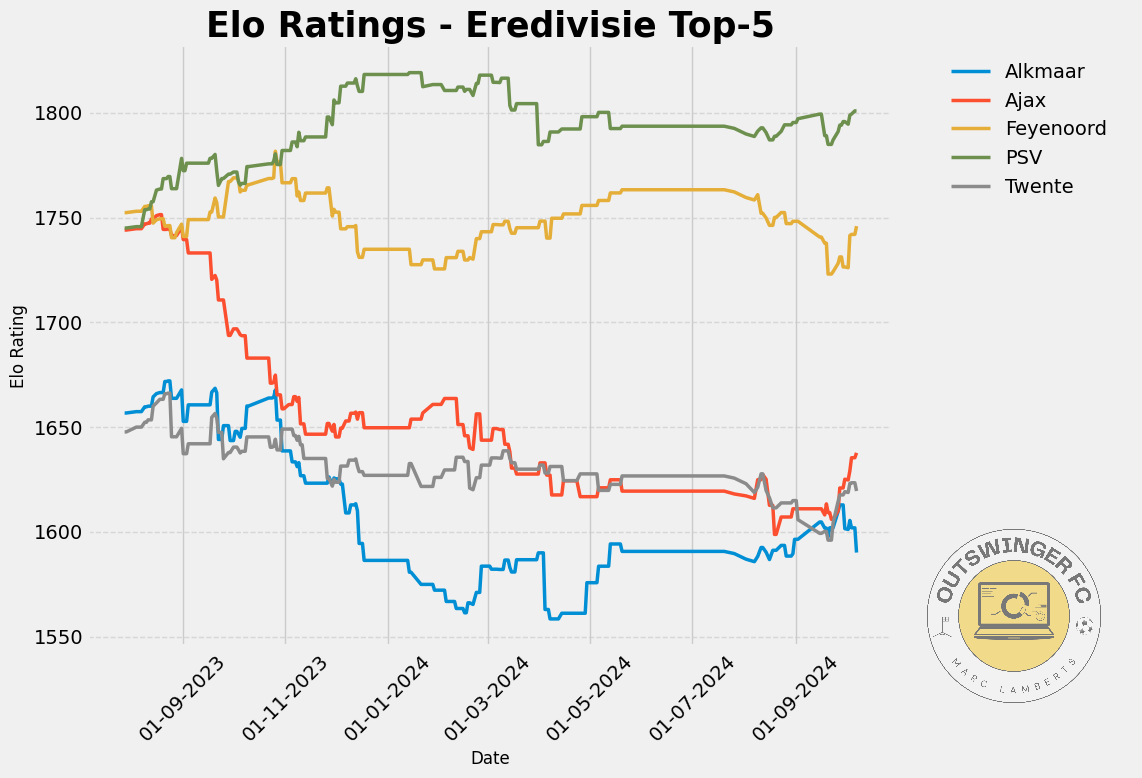

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib.image as mpimg

# Load the existing data from your Excel file
df = pd.read_excel("/Users/marclambertes/Python/ELONL.xlsx", index_col=0, parse_dates=True)

# Set the column names for date ranges
from_column = "From"
to_column = "To"

# Convert 'From' and 'To' columns to datetime
df[from_column] = pd.to_datetime(df[from_column], errors='coerce')
df[to_column] = pd.to_datetime(df[to_column], errors='coerce')

# Ensure index is a DatetimeIndex, if it's not already
if not pd.api.types.is_datetime64_any_dtype(df.index):
    df.index = pd.to_datetime(df.index, errors='coerce')

# Define the fixed date range for filtering
start_date = pd.Timestamp("2023-07-01")
end_date = pd.Timestamp("2024-10-10")

# Filter the DataFrame to include only rows where 'From' and 'To' are within the specified date range
df_filtered = df[(df[from_column] <= end_date) & (df[to_column] >= start_date)]

# Reset index to avoid issues with datetime index during pivoting
df_filtered = df_filtered.reset_index()

# Print out the filtered DataFrame to verify the data
print("Filtered DataFrame:")
print(df_filtered.head())

# Pivot the DataFrame to get the Elo ratings for each club by date
df_pivot = df_filtered.pivot_table(index="From", columns="Club", values="Elo")

# Fill NaN values using forward-fill method, then backward-fill to ensure continuity
df_pivot = df_pivot.ffill().bfill()

# Print out the pivoted DataFrame to verify column names and data
print("Pivoted DataFrame:")
print(df_pivot.head())

# Check if the index of the pivoted DataFrame is a datetime index
if not pd.api.types.is_datetime64_any_dtype(df_pivot.index):
    df_pivot.index = pd.to_datetime(df_pivot.index, errors='coerce')

# Filter pivoted data to include only the date range of interest
df_filtered_pivot = df_pivot.loc[start_date:end_date]

# Print out the filtered pivoted DataFrame to verify the data
print("Filtered Pivoted DataFrame:")
print(df_filtered_pivot.head())

# Plotting in the style similar to FiveThirtyEight
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(12, 8))  # Increase figure size

# Define the teams you want to plot
teams = ["Alkmaar", "Ajax", "Feyenoord", "PSV", "Twente"]  # Ensure these match your column names in the Excel file

for team in teams:
    if team in df_filtered_pivot.columns:
        ax.plot(df_filtered_pivot.index, df_filtered_pivot[team], label=team, linewidth=2.5)
    else:
        print(f"Warning: {team} not found in the data.")

# Formatting the plot
plt.title(f"Elo Ratings - Eredivisie Top-5", fontsize=25, weight='bold')
plt.ylabel("Elo Rating", fontsize=12)
plt.xlabel("Date", fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Improve legend placement
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), frameon=False)

# Format the x-axis for better date readability
date_format = DateFormatter("%d-%m-%Y")
ax.xaxis.set_major_formatter(date_format)
plt.xticks(rotation=45)

# Load and add the logo image
logo_img = mpimg.imread('Outswinger FC (3).png')  # Replace with your logo file path
logo_imgbox = OffsetImage(logo_img, zoom=0.1, alpha=0.5)  # Adjust zoom and alpha as needed
logo_ab = AnnotationBbox(logo_imgbox, (1.15, 0.05), frameon=False, pad=0.5, xycoords='axes fraction', boxcoords="axes fraction")
ax.add_artist(logo_ab)

plt.savefig('/Users/marclambertes/Python/Elo_Ratings_Plot.png', bbox_inches='tight', dpi=300)

# Display the plot
plt.tight_layout()
plt.show()
